# 1.数据集的传入和数据的初步分析

In [1]:
# 决策树模块
from sklearn import tree 

# 加载红酒数据集
from sklearn.datasets import load_wine

# 训练集和测试集的划分
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import graphviz

In [2]:
wine=load_wine()

In [3]:
data_df=pd.DataFrame(wine.data,columns=wine.feature_names)

In [4]:
target_df=pd.DataFrame(wine.target,columns=['target_names'])

In [5]:
data_wine=pd.concat([data_df,target_df],axis=1)
data_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_names
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

# 2.数据集的划分和分析

In [19]:
# 对训练集和测试集进行划分，注意顺序。test_size=0.3表示30%的测试集，random_state=7表示随机种子为7
xtrain, xtest, ytrain, ytest = train_test_split(wine.data, wine.target, test_size=0.3, random_state=7)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((124, 13), (54, 13), (124,), (54,))

# 3.模型的训练 

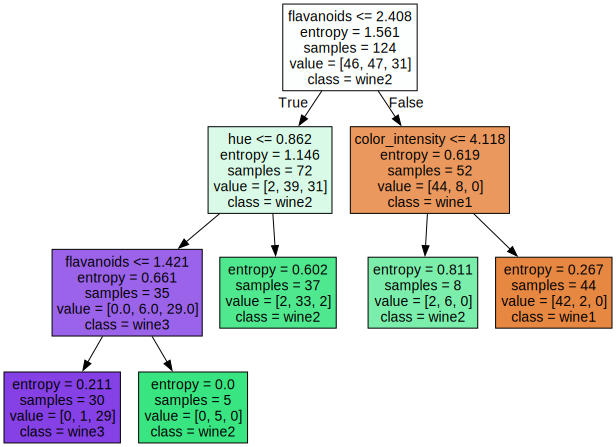

In [9]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=24, splitter='random', 
                                  max_depth=10, min_samples_leaf=3, min_samples_split=5, 
                                  min_impurity_decrease=0.1)  
clf.fit(xtrain,ytrain) 
score=clf.score(xtest,ytest)
dot_data=tree.export_graphviz(clf, feature_names=wine.feature_names, class_names=['wine1','wine2','wine3'], filled=True)
graph = graphviz.Source(dot_data)
graph

对模型进行训练，DecisionTreeClassifier()可选的一些参数为：<br>
1.criterion='gini' or 'entropy' 特征选择的指标，一个是基尼系数，一个是信息增益。<br>
2.random_state=0 随机种子，保证每次运行结果一致；<br>
3.split='best' or 'random' 特征选择的策略，一个是选择最好的特征，一个是随机选择特征。若选择 best, 可能会出现过拟合的现象；<br>
4.max_depth=3 树的最大深度，默认为 None，即不限制树的深度；<br>
5.min_samples_split=2 每个非叶节点至少要含有的样本数；<br>
6.min_samples_leaf=1  每个叶节点最少要含有的样本数；<br>
min_impurity_decrease=0.2 设置信息增益的阈值，若节点分裂后的信息增益小于改阈值，则该节点不进行分裂。

clf 常用的属性值包括以下：<br>
clf.fit(xtrain,ytrain)：拟合模型；<br>
clf.feature_importances_：特征重要性；<br>
clf.predict(xtest)：预测结果；<br>
clf.score(xtest,ytest)：模型评分；<br>
clf.apply(xtest)：返回叶子节点索引。

In [10]:
clf.apply(xtest)
# 返回的是每个测试点对应的结点，结点根据图示就可以知道是分到哪个类里面去了

array([3, 8, 3, 3, 7, 3, 4, 7, 7, 5, 7, 5, 5, 5, 5, 5, 7, 3, 8, 8, 5, 8,
       5, 5, 8, 3, 5, 3, 4, 3, 7, 7, 5, 7, 7, 5, 3, 3, 8, 3, 5, 5, 3, 3,
       5, 8, 8, 8, 5, 8, 7, 7, 8, 8], dtype=int64)

In [11]:
clf.feature_importances_
[*zip(clf.feature_importances_,wine.feature_names)]

[(0.0, 'alcohol'),
 (0.0, 'malic_acid'),
 (0.0, 'ash'),
 (0.0, 'alcalinity_of_ash'),
 (0.0, 'magnesium'),
 (0.0, 'total_phenols'),
 (0.6518951309445027, 'flavanoids'),
 (0.0, 'nonflavanoid_phenols'),
 (0.0, 'proanthocyanins'),
 (0.09526216076241496, 'color_intensity'),
 (0.2528427082930824, 'hue'),
 (0.0, 'od280/od315_of_diluted_wines'),
 (0.0, 'proline')]

# 4.模型分析

<BarContainer object of 13 artists>

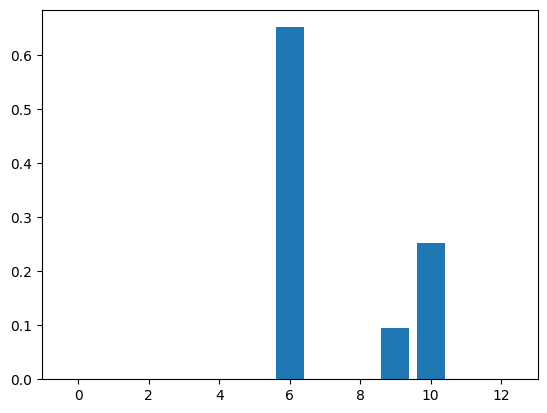

In [12]:
from matplotlib import pyplot as plt 
plt.bar(range(len(clf.feature_importances_)),clf.feature_importances_)

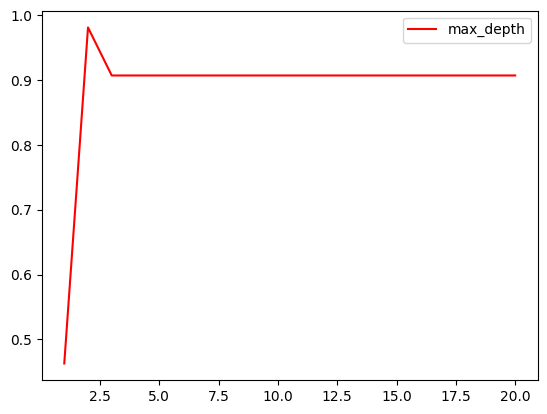

In [13]:
# 如何选择超参数，绘制学习曲线
import matplotlib.pyplot as plt
test=[]
for i in range(20):
    clf=tree.DecisionTreeClassifier(max_depth=i+1,criterion="entropy",random_state=30)
    clf.fit(xtrain,ytrain)
    score=clf.score(xtest,ytest)
    test.append(score)
plt.plot(range(1,21),test,color="red",label="max_depth")
plt.legend()
plt.show()

1.剪枝参数不一定能提升score，调参没有决定的答案。<br>
2.网格搜索是一个还不错的方法。<br>
3.预剪枝和后剪枝同时进行操作。

# 5.回归树

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
housing=fetch_california_housing()
pd.DataFrame(housing.data,columns=housing.feature_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [15]:
pd.DataFrame(housing.target).describe()

,0
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


## 5.1 十折交叉验证

In [16]:
regressor=DecisionTreeRegressor(random_state=0)
#交叉验证分数，十折交叉验证
cross_val_score(regressor,housing.data,housing.target,cv=10,scoring='neg_mean_squared_error').mean()

-0.8099329967463953